# FASE 01 - ANÁLISE EXPLORATÓRIA DE DADOS

## AULA 01 - ACQUISIÇÃO E LEITURA DE DADOS REAIS

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format #FORMATTING DECIMAL PLACES VISIBILITY

In [14]:
dados = pd.read_csv('../data/01-pos-datascience-analise-e-exploracao-de-dados/A152918189_28_143_208.csv',
                    encoding='ISO-8859-1', #SETTING BRAZILIAN ENCODING
                    skiprows=3, #SKIPING USELESS ROWS AT THE BEGINNING OF THE FILE
                    sep=';', #SETTING SEPARATOR
                    skipfooter=12, #IGNORING USELESS ROWS AT THE END OF THE FILE
                    thousands='.', #SETTING PROPER THOUSAND SEPARATOR
                    decimal=',', #SETTING PROPER DECIMAL SEPARATOR
                    engine="python") #CHANING ENGINE FROM 'C' TO 'PYTHON' TO AVOID WARNINGS

In [3]:
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,9858841.18,9806315.07,14946369.28,15552930.66,16269008.71,15380532.08,14228814.25,12427865.05,10345616.78,1088059702.25
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,3715723.12,3538427.92,4077045.92,6307616.67,6354514.15,3461663.11,4979239.30,4138751.64,-,475290315.34
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,21621697.26,26163677.75,23445832.76,23154039.32,26127701.15,26447055.27,24457791.81,22731356.54,19840265.30,2061943006.93
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3266928.47,3519773.73,4437161.10,5171370.92,4266254.94,3103979.88,3743330.65,3781921.16,3150835.05,352546288.71
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,38813794.18,39251569.26,40639703.77,46608262.09,55310881.51,48215050.10,45801750.84,43262884.30,14569318.55,4968811817.17


In [4]:
dados.mean()

C:\Users\User\AppData\Local\Temp\ipykernel_8944\3010149702.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.mean()


2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2021/Mai     79540074.51
2021/Jun     82724335.66
2021/Jul     81601322.73
2021/Ago     75035922.89
Total      6852328259.77
Length: 164, dtype: float64

### ! Challenge: show mean for the most recent date

In [5]:
'{} - {}'.format(dados.mean().index[-2], dados.mean().values[-2])

C:\Users\User\AppData\Local\Temp\ipykernel_8944\2587429231.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  '{} - {}'.format(dados.mean().index[-2], dados.mean().values[-2])
C:\Users\User\AppData\Local\Temp\ipykernel_8944\2587429231.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  '{} - {}'.format(dados.mean().index[-2], dados.mean().values[-2])


'2021/Ago - 75035922.89037038'

In [6]:
last_date = dados.columns[-2]
last_date

'2021/Set'

***

## AULA 02 - PRIMEIRAS VISUALIZAÇÕES DE DADOS

<Axes: xlabel='Unidade da Federação'>

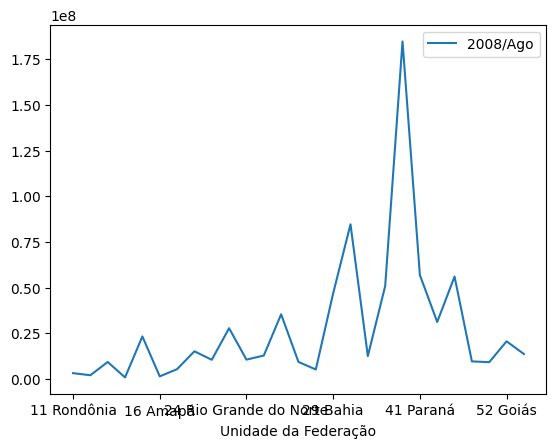

In [7]:
dados.plot(x='Unidade da Federação', y='2008/Ago')

### IMPORTING NEW LIBRARY TO IMPROVE VISUALIZATION

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker #USED TO FORMAT VALUES

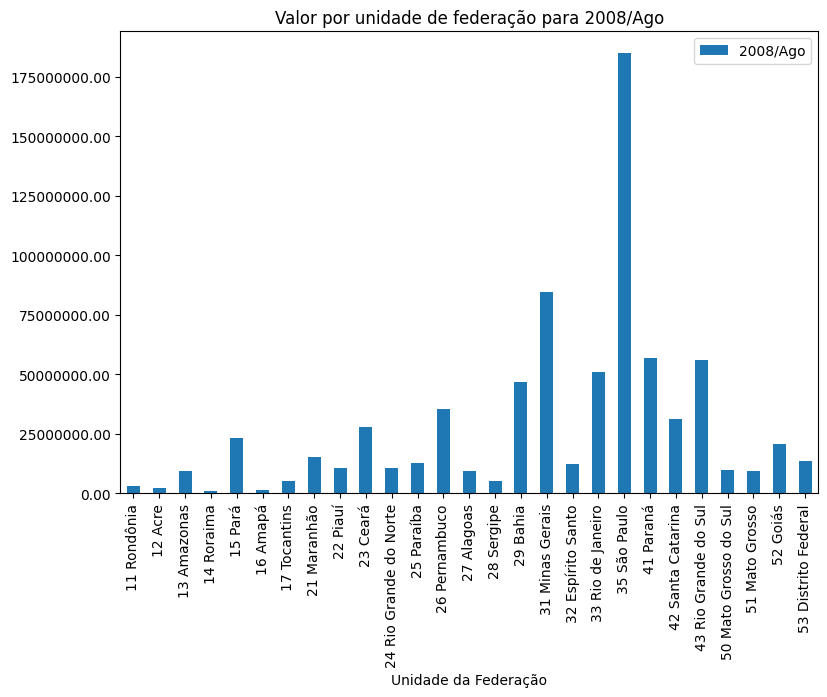

In [9]:
axis = dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(9,6))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}')) #FORMATTING Y AXIS

plt.title('Valor por unidade de federação para 2008/Ago')
plt.show()

### ! Challenge:
    - Make the same chart with same data from last class, considering most recent date ignoring the Total column
    - Rotate X axis to facilitate reading

In [10]:
last_date

'2021/Set'

In [11]:
""" Handling with strange value in the column from most recent date, there is a string " - ".
    It is not possible to plot this column if this value remain, I decided to replace it by 0.
"""
dados[last_date] = dados[last_date].replace('-', '0').astype('float64')

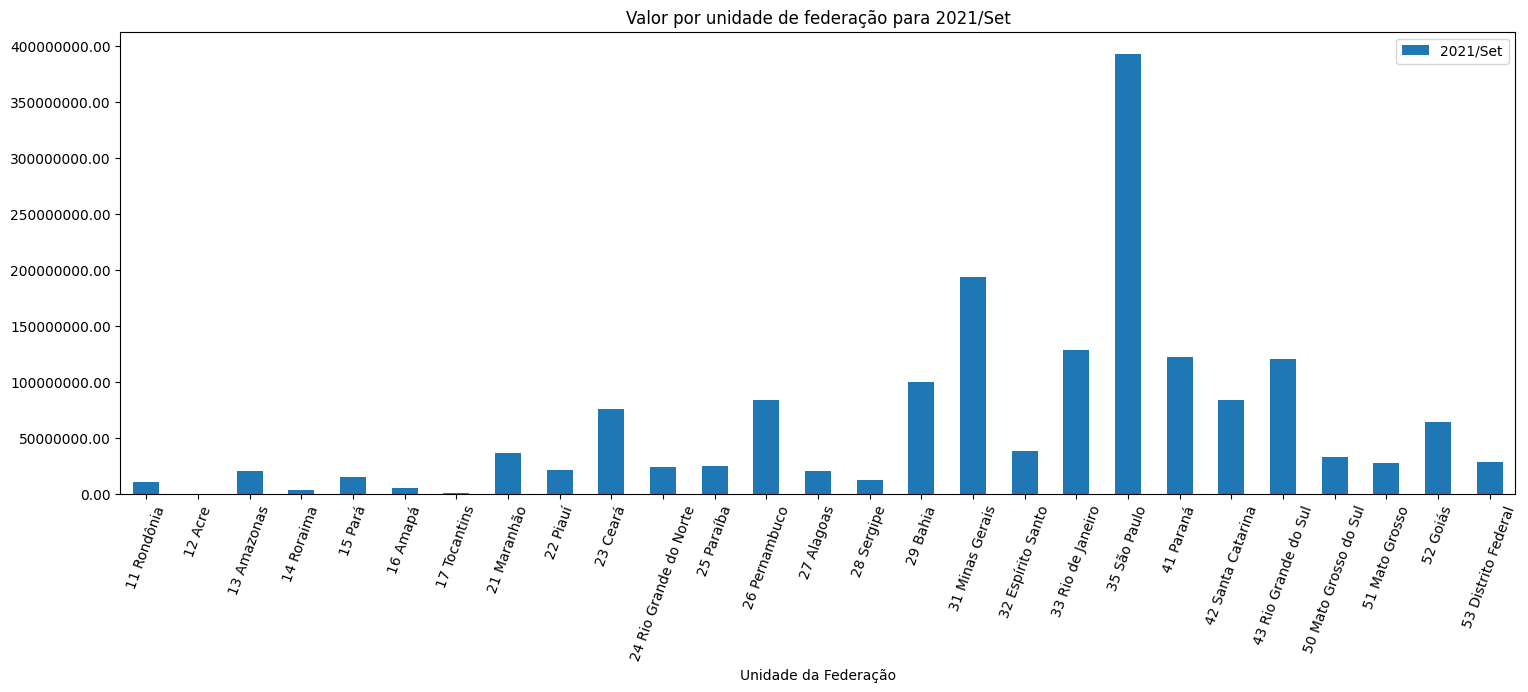

In [12]:
axis = dados.plot(x='Unidade da Federação', y=f'{last_date}', kind='bar', figsize=(18,6), rot=70) #USING ROT TO ROTATE X AXIS TEXT
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}')) #FORMATTING Y AXIS

plt.title(f'Valor por unidade de federação para {last_date}')
plt.show()

***

## AULA 03 - MANIPULAÇÃO DE DADOS

### VIDEO 01

In [13]:
dados = pd.read_csv('../data/01-pos-datascience-analise-e-exploracao-de-dados-aula1/A150850189_28_143_208.csv',
                    encoding='ISO-8859-1', #SETTING BRAZILIAN ENCODING
                    skiprows=3, #SKIPING USELESS ROWS AT THE BEGINNING OF THE FILE
                    sep=';', #SETTING SEPARATOR
                    skipfooter=12, #IGNORING USELESS ROWS AT THE END OF THE FILE
                    thousands='.', #SETTING PROPER THOUSAND SEPARATOR
                    decimal=',', #SETTING PROPER DECIMAL SEPARATOR
                    engine="python") #CHANING ENGINE FROM 'C' TO 'PYTHON' TO AVOID WARNINGS

FileNotFoundError: [Errno 2] No such file or directory: '../data/01-pos-datascience-analise-e-exploracao-de-dados-aula1/A150850189_28_143_208.csv'

In [ ]:
dados.head()

In [ ]:
colunas_usaveis = dados.mean().index.tolist() # GETTING COLUMNS WITH NO NaN VALUES, THE "MEAN" METHOD ALREADY IGNORE NaN VALUES
colunas_usaveis.insert(0, 'Unidade da Federação') # INSERTING THE REFERENCE COLUMN BECAUSE IT GET LOST WHEN USING MEAN THAT ONLY CONSIDERS NUMBERS

dados_usaveis = dados[colunas_usaveis] #FILTERING
dados_usaveis.head()

In [ ]:
dados_usaveis =  dados_usaveis.set_index('Unidade da Federação')
dados_usaveis.head()

In [ ]:
dados_usaveis.loc['12 Acre'] # SELECTING THE INDEX WITH .loc METHOD (LOCATE) the LINE WITH INDEX "12 Acre"

In [ ]:
dados_usaveis.iloc[1] # SELECTING THE SAME DATA FROM ABOVE BUT WITH i INDICATOR (NOT INDEX!)

In [ ]:
dados_usaveis.plot(figsize=(12,6)) #PLOTING DRAFT

In [ ]:
dados_usaveis.T.head() #USING 'T' TO "TRANSPOR" THE DATA, BASICALLY SWITCH ROWS BY COLUNS AND ETC..

In [ ]:
dados_usaveis.T.plot(figsize=(12,6)) #USING TRASPOSE TO PLOT DATA AND HAVE COLUNS RELATED TO TIME AS x AXIS

We have an issue because the **total** column is still in the data and it basically have the sum of each month in the end, this way the chart gets very high in the end.

We are going to delete **total** column (before "TRANSPOR", later we "TRANSPOR" the data and plot again).

In [ ]:
dados_usaveis = dados_usaveis.drop('Total', axis=1)
dados_usaveis.T.plot(figsize=(12,6))

Much better (not perfect)...

#### ! Challenge:
- Reposition of the legends, to get the chart more visible - ok
- Review Title of the chart - ok
- Put proper axis titles (x & y)

In [ ]:
axis = dados_usaveis.T.plot(figsize=(12,6))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

axis.set(xlabel='Ano/mês', ylabel='Valor total')

plt.title('''Procedimentos hospitalares do SUS - por local de internação - Brasil.\n
Valor total por Unidade da Federação e Ano/mês atendimento
        ''')

plt.legend(bbox_to_anchor=(1.0, 1.1), loc='upper left')
plt.show()

***

### VIDEO 02

In [ ]:
dados_usaveis[:7].T.plot(figsize=(10,6)) # GETTING FIRST 7 STATES

In [ ]:
dados_usaveis.sample(n=7).T.plot(figsize=(10,6)) # GETTING 7 IN RANDOM ORDER

#### SETTING SEED TO GET SAME RANDOM DATA (TO FACILITATE REPRODUCABILITY)

In [ ]:
import numpy as np

np.random.seed(524387)
dados_usaveis.sample(n=7)

In [ ]:
dados_dos_7_estados = dados_usaveis.sample(n=7)

In [ ]:
dados_dos_7_estados.T.plot(figsize=(10,6))

In [ ]:
dados_dos_7_estados['Total'] = dados_dos_7_estados.sum(axis=1)
dados_dos_7_estados.head()

#### ! Challenge:
- Sort last dataframe on Total column **descending** (first row with max value, last row row min value)
- Add column with Region of each State (north, south)
- Add my state (SP or other) to the Seven random and get 8

In [ ]:
# 01
dados_dos_7_estados.sort_values(by='Total', ascending=False)[['Total']]

In [ ]:
# 03
dados_dos_8_estados = dados_dos_7_estados.append(dados_usaveis.loc['22 Piauí'])
dados_dos_8_estados['Total'] = dados_dos_8_estados.sum(axis=1)

In [ ]:
dados_dos_8_estados

In [ ]:
# 02
def get_region(string: str) -> str:
    norte = ['Amazonas', 'Roraima', 'Amapá' 'Pará', 'Tocantins','Rondônia', 'Acre'] #NORTH REGION
    nordeste = ['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Pernambuco', 'Paraíba', 'Sergipe', 'Alagoas', 'Bahia'] #NORTH EAST REGION
    centro_oeste = ['Mato Grosso', 'Mato Grosso do Sul', 'Goiás'] # MIDWEST REGION
    sudeste = ['São Paulo', 'Rio de Janeiro', 'Espírito Santo', 'Minas Gerais'] # SOUTHEAST REGION
    south = ['Paraná', 'Rio Grande do Sul', 'Santa Catarina'] # SOUTH REGION
    
    if string in norte:
        return 'Norte'
    elif string in nordeste:
        return 'Nrdeste'
    elif string in centro_oeste:
        return 'Centro Oeste'
    elif string in sudeste:
        return 'Sudeste'
    elif string in south:
        return 'Sul'
    else:
        'Error'

In [ ]:
dados_dos_8_estados['Estado'] = dados_dos_8_estados.index.str[3:]
dados_dos_8_estados['Regiao'] = dados_dos_8_estados['Estado'].apply(get_region)

In [ ]:
dados_dos_8_estados

***

### VIDEO 03

#### ! Resolution of the challenges
Already did for each challenge before

***

## AULA 04 - Análise de gráficos e criação de hipóteses

In [ ]:
# dados_dos_7_estados.drop(columns={'Total'}).T.plot(figsize=(10,6))

In [ ]:
dados_8_estados_sorted = dados_dos_8_estados.sort_values(by='Total', ascending=False)
dados_aula_04 = dados_8_estados_sorted.drop(columns={'Total', 'Estado', 'Regiao'}) #REMOVINGI STRING COLUMNS TO PLAY WITH VISUAZLIATION

dados_aula_04_dividos_por_milhao = dados_aula_04 /  1_000_000 #DIVIDING PER MILLION TO FACILITATE VISUALIZATION

columns_to_plot = dados_aula_04_dividos_por_milhao.columns[53:].tolist() #GETTING COLUMNS STARTING ON 2012/Jan
dados_aula_04_usavel = dados_aula_04_dividos_por_milhao[columns_to_plot] #USING COLUMNS SELECTED ABOVE

In [ ]:
# dados_aula_04_dividos_por_milhao = dados_aula_04_usavel /  1_000_000 #DIVIDING PER MILLION TO FACILITATE VISUALIZATION

In [ ]:
axis = dados_aula_04_usavel.head(3).T.plot(figsize=(10,6))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
axis.set_ylabel("Gastos aprovados por milhões de reais")

plt.ylim(0, 650)

#### ! Challenges
1. Padronizar os tickes verticais para espaçamento de 12 em 12 unidades (uma vez por ano)

In [ ]:
def get_proper_max_value(data):
    """ Returning proper value to set maximum Y axis"""
    all_values = []
    for each_list in data.values.tolist():
        for item in each_list:
            all_values.append(item)
    
    return max(all_values) + 100

In [ ]:
# REUTILIZING DATA FROM PAST LESSON
# DECIDED TO USE DATA FROM AUGUST FOR EACH YEAR
january_columns = list(filter(lambda month: 'Ago' in month, list(dados_aula_04_dividos_por_milhao.columns)))

In [ ]:
data_to_plot = dados_aula_04_dividos_por_milhao[january_columns].head(3)
axis = data_to_plot.T.plot(figsize=(20,6))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
axis.set_ylabel("Gastos aprovados por milhões de reais")

plt.ylim(0, get_proper_max_value(data_to_plot))
plt.grid(color = '#e5e5e5', linestyle = 'dashed', linewidth = 0.9)

! Resolution: chart above is done, trick chart beacause depending on the month for each year, the chart completly changes...

***

## AULA 05 - Manipulação e interpretação de gráficos

In [ ]:
_dados_usaveis = dados_usaveis / 1_000_000
mes_mais_recente = _dados_usaveis.columns[-1] #REUTILIZANDO DADOS DA AULA 01
gastos_do_mais_recente = _dados_usaveis[mes_mais_recente]

In [ ]:
gastos_do_mais_recente

In [ ]:
# Proporção dos meses comparados a coluna 41 Paraná
tabela_de_comparacao = gastos_do_mais_recente / gastos_do_mais_recente.loc['41 Paraná']

In [ ]:
tabela_de_comparacao = tabela_de_comparacao.sort_values(ascending=False)
tabela_de_comparacao.plot(kind='bar')

#### ! Challenges
1. Atualizar o último gráfico para refletir o seu estado, incluindo grid, eixos e etc.

In [ ]:
# Proporção dos meses comparados a coluna 29 Bahia
tabela_de_comparacao_challenge = gastos_do_mais_recente / gastos_do_mais_recente.loc['29 Bahia']
tabela_de_comparacao_challenge = tabela_de_comparacao_challenge.sort_values(ascending=False)

In [ ]:
tabela_de_comparacao_challenge

In [ ]:
axis = tabela_de_comparacao_challenge.plot(kind='bar', figsize=(20,5), rot=60)
axis.set_ylabel('Vezes')

plt.title('Gastos comparados ao estado da Bahia')
plt.grid(color='#e5e5e5', linestyle='--', linewidth=0.9, axis='y')
plt.show()

2. Colorir o seu estado com um tom diferente

In [ ]:
# SETTING COLORS FOR EACH COLUMNS BASED ON BIGGER OR LOWER COMPARED WITH BAHIA VALUE
color_list = []
valor_bahia = tabela_de_comparacao_challenge.loc['29 Bahia']
for value in tabela_de_comparacao_challenge.values:
    if value == valor_bahia: color_list.append('#FFD264')
    elif value > valor_bahia: color_list.append('#30A2FF')
    else: color_list.append('#000000')

In [ ]:
axis = tabela_de_comparacao_challenge.plot(kind='bar', figsize=(20,5), rot=60, color=color_list)
axis.set_ylabel('Vezes')

plt.title('Gastos comparados ao estado da Bahia')
plt.grid(color='#e5e5e5', linestyle='--', linewidth=0.9, axis='y')
plt.show()

3. gastos por população de dois estados. Escolher dois estados, plotar a comparação desses gastsos de acordo com a população deles.

-> TO DO

4. Passar uma linha horizontal no seu estado. Anotando o gráfico com uma linha

In [ ]:
axis = tabela_de_comparacao_challenge.plot(kind='bar', figsize=(20,5), rot=60, color=color_list)
plt.axhline(valor_bahia, color='red', ls='dotted')
axis.set_ylabel('Vezes')

plt.title('Gastos comparados ao estado da Bahia')
plt.show()

***

# CHALLENGE LAST CLASS
Análise vinhos FIAPWine